<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/fun/6174_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 6174 是一个特殊的数字
- 4位数中(除了所有值是一样的 1111/2222/...) 都可以通过对4位数进行排序后，大值减去小值，循环一定的次数得到 6174
- 例如 3132
 - 3321 - 1233 = 2088
 - 8820 - 288 = 8532
 - 8532 - 2358 = 6174
 - loops = 3

In [1]:
import pandas as pd

In [4]:
def update_minmax(dn):
    new_dn = [int(dn/1000), int(dn%1000/100),int(dn%100/10), int(dn%10)]
    minsdn = sorted(new_dn)
    smin = minsdn[0] * 1000 + minsdn[1] * 100 + minsdn[2] * 10  + minsdn[3]
    smax = minsdn[3] * 1000 + minsdn[2] * 100 + minsdn[1] * 10  + minsdn[0]
    return smin, smax


def cal_loops(dn):
    smin, smax = update_minmax(dn)
    #print(f'input is {dn} - smin {smin} - smax {smax}')
    wloop = 0
    while True:
        snew = smax - smin
        #print(f'smax - smin {smax} - {smin} = {snew}')
        wloop += 1
        if snew == 6174:
            #print(f'Final is 6174, loop is {wloop}')
            break
        smin, smax = update_minmax(snew)
        if wloop > 10000:
            #print(f'Maybe not right')
            break
    return wloop

In [5]:
dlp_df = pd.DataFrame(columns=['number', 'loops'])
for i in range(1000,10000):
    #print(i)
    nloops = cal_loops(i)
    index = len(dlp_df)
    dlp_df.loc[index] = [i, nloops]

dlp_df.to_csv("6174.csv")

## 异常值
- 所有4位数字都相同

In [24]:
dlp_df[dlp_df.loops == 10001]

,number,loops
111,1111,10001
1222,2222,10001
2333,3333,10001
3444,4444,10001
4555,5555,10001
5666,6666,10001
6777,7777,10001
7888,8888,10001
8999,9999,10001


In [12]:
abnormal_cols = list(dlp_df[dlp_df.loops == 10001].index)

In [13]:
dfnew = dlp_df.drop(abnormal_cols, axis=0)

## 平均需要的loops 

In [35]:
dfnew.loops.mean()

4.678678678678678

## 统计需要的loops 分布
- loops=3 的数字最多
- 其他的依次从7-->1 统计量递减

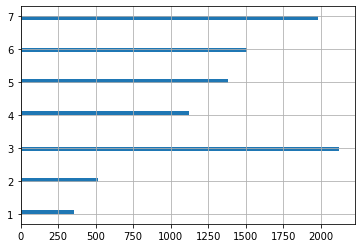

In [36]:
dfnew.loops.hist(bins=50, orientation='horizontal')